[Text(0.5, 1.0, 'Distribution of Sqft of General Living Area')]

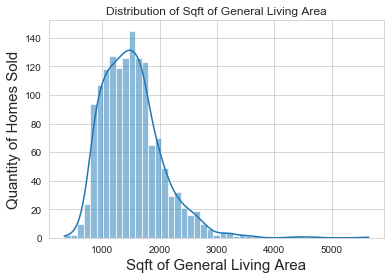

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

########## 1 ##########

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


########## 2 ##########

#1 Continuous feature - GrLivArea

p = sns.histplot(data = train, x = 'GrLivArea', kde= True)
p.set_xlabel("Sqft of General Living Area", fontsize = 15)
p.set_ylabel("Quantity of Homes Sold", fontsize = 15)
p.set(title = "Distribution of Sqft of General Living Area")

[Text(0.5, 1.0, 'Distribution of Sqft of the First Floor')]

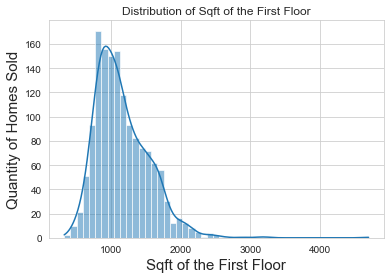

In [74]:
#2 Continuous feature - 1stFlrSf

firstFloor = sns.histplot(data = train, x = '1stFlrSF', kde= True)
firstFloor.set_xlabel("Sqft of the First Floor", fontsize = 15)
firstFloor.set_ylabel("Quantity of Homes Sold", fontsize = 15)
firstFloor.set(title = "Distribution of Sqft of the First Floor")


[Text(0.5, 1.0, 'Distribution of Total Sqft of the First Floor')]

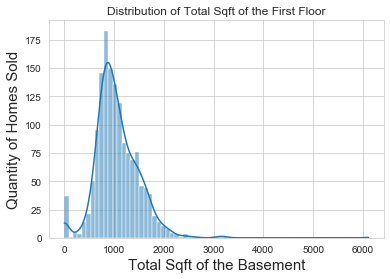

In [75]:
#3 Continuous feature - TotalBsmtSF

firstFloor = sns.histplot(data = train, x = 'TotalBsmtSF', kde= True)
firstFloor.set_xlabel("Total Sqft of the Basement", fontsize = 15)
firstFloor.set_ylabel("Quantity of Homes Sold", fontsize = 15)
firstFloor.set(title = "Distribution of Total Sqft of the First Floor")


[Text(0.5, 1.0, 'Distribution of the Different Garage Types')]

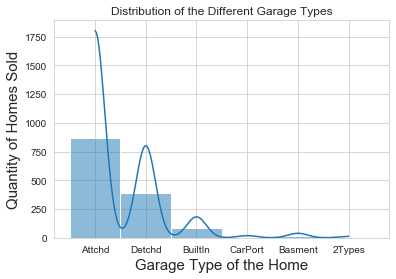

In [76]:
#1 Categorical feature - GarageType

firstFloor = sns.histplot(data = train, x = 'GarageType', kde= True)
firstFloor.set_xlabel("Garage Type of the Home", fontsize = 15)
firstFloor.set_ylabel("Quantity of Homes Sold", fontsize = 15)
firstFloor.set(title = "Distribution of the Different Garage Types")




[Text(0.5, 1.0, 'Distribution of the RoofStyle of Homes')]

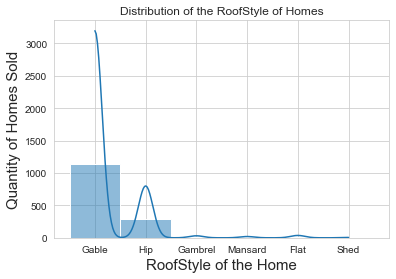

In [77]:
#2 Categorical feature - RoofStyle
firstFloor = sns.histplot(data = train, x = 'RoofStyle', kde= True)
firstFloor.set_xlabel("RoofStyle of the Home", fontsize = 15)
firstFloor.set_ylabel("Quantity of Homes Sold", fontsize = 15)
firstFloor.set(title = "Distribution of the RoofStyle of Homes")


[Text(0.5, 1.0, 'Distribution of the Sale Condition of Sold Homes')]

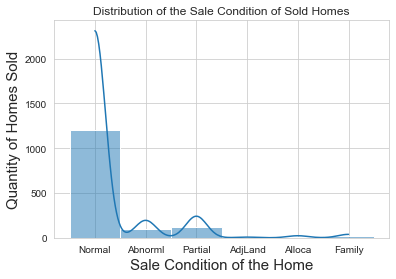

In [78]:
#3 Categorical feature - SaleCondition

firstFloor = sns.histplot(data = train, x = 'SaleCondition', kde= True)
firstFloor.set_xlabel("Sale Condition of the Home", fontsize = 15)
firstFloor.set_ylabel("Quantity of Homes Sold", fontsize = 15)
firstFloor.set(title = "Distribution of the Sale Condition of Sold Homes")

In [79]:
########## 3 ##########

#Pre-process your data
#unique_ids = len(set(train.ID)


# The first step in pre-processing data is understanding the dimensions/size of your data set 
# The following function below shows the number of rows and columns of my data
# There are 1460 rows and 80 columns (the 81st column is the Sale Price, which we will be predicting)

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [80]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [81]:
print(test.shape)
print(train.shape)

(1459, 80)
(1460, 81)


In [82]:
# The next step in pre-processing data is understanding how many different types of data in present in the data set.  
# There are 1460 entries/rows of data which have 80 corresponding columns (exlcuding the sale price in the training data)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [83]:
train_numeric_features = train.dtypes[train.dtypes != "object"].index
#numeric_features = numeric_features.drop("SalePrice") 


In [84]:
train_numeric_features

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [85]:
train_categorical_features = train.dtypes[train.dtypes == "object"].index


In [86]:
train_categorical_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [87]:
# Here we get an idea of the percentage of data values that have missing data ("NA" values) across the 80 variables
# Since the vast majority (over 80%) of data in these missing columns are missing, we will drop it since its wont be of great
# use to use and it wont serve as meanginful data used to make predictions.

train_na = train.isna().sum() / train.shape[0]
train_na[train_na > 0.6]




Alley          0.937671
PoolQC         0.995205
Fence          0.807534
MiscFeature    0.963014
dtype: float64

In [88]:
test_na = test.isna().sum() / test.shape[0]
test_na[test_na > 0.6]

Alley          0.926662
PoolQC         0.997944
Fence          0.801234
MiscFeature    0.965045
dtype: float64

In [89]:
#Here we are dropping the columns of data that have 60% or more missing values 

train.drop(train_na[train_na > 0.6].index, axis = 1, inplace = True)

In [90]:
# the same approach is applied to the test data, we drop columns that have >60% missing data 
test.drop(test_na[test_na > 0.6].index, axis = 1, inplace = True)

In [91]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [92]:
#### Here we drop the 'Id' column because its just a counter for the number of rows, which we do not need
train  = train.drop('Id', axis =1)

In [93]:
test = test.drop('Id', axis = 1)

In [94]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [95]:
test.shape

(1459, 75)

In [96]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [97]:
train.shape

(1460, 76)

In [98]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [99]:
# Here we are creating a function which returns a dataframe containing the total missing values and percentage of total 
# missing values of a column.

def find_missing_percent(train):
    miss_df = pd.DataFrame({'ColumnName':[],'Total Missing Values':[],' % Missing':[]})
    for col in train.columns:
        sum_miss_val = train[col].isnull().sum()
        percent_miss_val = round((sum_miss_val/train.shape[0])*100,2)
        miss_df = miss_df.append(dict(zip(miss_df.columns,[col,sum_miss_val,percent_miss_val])),ignore_index=True)
    return miss_df

In [100]:
# Now that we have removed columns that contain more than 60% of missing data, we observe the remaining data to observe
# the extend to which data is missing from the remaining columns

# Below is a chart which displays the columns with missing values and the % of that column that has missing values


miss_df = find_missing_percent(train)

display(miss_df[miss_df[' % Missing']>0.0])
print("\n")
print(f"Number of columns with missing values:{str(miss_df[miss_df[' % Missing']>0.0].shape[0])}")

,ColumnName,Total Missing Values,% Missing
2,LotFrontage,259.0,17.74
23,MasVnrType,8.0,0.55
24,MasVnrArea,8.0,0.55
28,BsmtQual,37.0,2.53
29,BsmtCond,37.0,2.53
30,BsmtExposure,38.0,2.60
31,BsmtFinType1,37.0,2.53
33,BsmtFinType2,38.0,2.60
40,Electrical,1.0,0.07
55,FireplaceQu,690.0,47.26




Number of columns with missing values:15


In [101]:

miss_df = find_missing_percent(test)

display(miss_df[miss_df[' % Missing']>0.0])
print("\n")
print(f"Number of columns with missing values:{str(miss_df[miss_df[' % Missing']>0.0].shape[0])}")

,ColumnName,Total Missing Values,% Missing
1,MSZoning,4.0,0.27
2,LotFrontage,227.0,15.56
7,Utilities,2.0,0.14
21,Exterior1st,1.0,0.07
22,Exterior2nd,1.0,0.07
23,MasVnrType,16.0,1.10
24,MasVnrArea,15.0,1.03
28,BsmtQual,44.0,3.02
29,BsmtCond,45.0,3.08
30,BsmtExposure,44.0,3.02




Number of columns with missing values:29


In [102]:
# We observe that 'FireplaceQu' also has a high percentage of missing values, so we remove this column of data

train.drop('FireplaceQu', axis=1, inplace=True)

In [103]:
# We also drop this column for the Test data 
test.drop('FireplaceQu', axis=1, inplace=True)

In [104]:
train.shape

(1460, 75)

In [105]:
test.shape

(1459, 74)

In [106]:
# Here we divide the data into numerical and categorical values 

train_numerical = train.select_dtypes(exclude='object')
train_categorical = train.select_dtypes(include='object')

test_numerical = test.select_dtypes(exclude='object')
test_categorical = test.select_dtypes(include='object')



In [107]:
# Here we take all missing data from the numerical columns and we replace those N/A values with the mean of that column
#Now that we have replaced missing (N/A) data with the mean, our numerical columns now have no missing values

from sklearn.impute import SimpleImputer
Imputer = SimpleImputer(missing_values=np.nan, strategy='mean').fit(train_numerical)
num_imputed = Imputer.transform(train_numerical)
print(np.isnan(num_imputed).sum()/len(train_numerical))


0.0


In [108]:
# We aldo fill missing numerical values with the mean for the testing data set

Imputer = SimpleImputer(missing_values=np.nan, strategy='mean').fit(test_numerical)
num_imputed = Imputer.transform(test_numerical)
print(np.isnan(num_imputed).sum()/len(test_numerical))

0.0


In [109]:
color_map = sns.light_palette("blue", as_cmap=True)
numerical_var = pd.DataFrame((train_numerical/train_numerical.mean()).var(), columns=['variance']).apply(lambda x:np.round(x,3))
numerical_var = numerical_var.style.background_gradient(cmap=color_map)

numerical_var

,variance
MSSubClass,0.553000
LotFrontage,0.120000
LotArea,0.901000
OverallQual,0.051000
OverallCond,0.040000
YearBuilt,0.000000
YearRemodAdd,0.000000
MasVnrArea,3.050000
BsmtFinSF1,1.057000
BsmtFinSF2,12.010000


In [110]:
#There are certain columns of data that have low variance (not much change in the data) and it will not be of much
# predictive use to our models 

# We remove the columns of numerical data with very low variance 

from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=0.05).fit(train_numerical/train_numerical.mean())
select_col = selection.get_support()
numerical_imputed_Variance = num_imputed.loc[:,select_col]


AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [111]:
numerical_imputed_Variance

NameError: name 'numerical_imputed_Variance' is not defined

In [112]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(numerical_imputed_Variance)
numerical_imputed_Variance = scaler.transform(numerical_imputed_Variance)
numerical_imputed_Variance = pd.DataFrame(numerical_imputed_Variance)

NameError: name 'numerical_imputed_Variance' is not defined

In [113]:
numerical_imputed_Variance

NameError: name 'numerical_imputed_Variance' is not defined

In [114]:
######################################################################################################
# Now that we have resolved missing values and normalized numerical values for our numerical data,
# we will now ensure our columns with categorical values do not have a significant portion of its data as missing
# values

from matplotlib import cm
categorical_na = pd.DataFrame(train_categorical.isnull().sum()/len(train_categorical), columns=['NaN'])
categorical_na.style.background_gradient(cmap = 'PuBu')

,NaN
MSZoning,0.000000
Street,0.000000
LotShape,0.000000
LandContour,0.000000
Utilities,0.000000
LotConfig,0.000000
LandSlope,0.000000
Neighborhood,0.000000
Condition1,0.000000
Condition2,0.000000


In [115]:
# We observe the same thing for catagorical testing data

test_categorical_na = pd.DataFrame(test_categorical.isnull().sum()/len(test_categorical), columns=['NaN'])
test_categorical_na.style.background_gradient(cmap = 'PuBu')

,NaN
MSZoning,0.002742
Street,0.000000
LotShape,0.000000
LandContour,0.000000
Utilities,0.001371
LotConfig,0.000000
LandSlope,0.000000
Neighborhood,0.000000
Condition1,0.000000
Condition2,0.000000


In [116]:
# For columns with a high % of missing data, we have removed them
# However, the illustration above shows that there still exists columns of data with missing values
# We replace these missing N/A values with 'No'

#categorical_fillna_with_no = categorical.fillna('No') 
train_categorical = train_categorical.fillna('No') 

In [117]:
# For columns with a high % of missing data, we have removed them
# However, the illustration above shows that there still exists columns of data with missing values
# We replace these missing N/A values with 'No'

#categorical_fillna_with_no = categorical.fillna('No') 
test_categorical = test_categorical.fillna('No') 

In [118]:
test_categorical.head()



,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [119]:
########## 4 ##########
list_cat = categorical.Street.unique()
print(list_cat)



NameError: name 'categorical' is not defined

In [120]:
#Histogram of the "Street" variable 

p = sns.histplot(data = categorical_fillna_with_no, x = 'Street', kde= True)
p.axis(ymin=0,ymax=1500)
p.axis(xmin = 0, xmax = 2)
p.set_xlabel("Distribution of Paved vs Gravel Street Types", fontsize = 15)
p.set_ylabel("Quantity of Homes Sold", fontsize = 15)
p.set(title = "Distribution of roads that are Paved vs Gravel")



NameError: name 'categorical_fillna_with_no' is not defined

In [121]:
# One common method of preprocessing categorical features is to use one-hot encoding (OHE)
# One-hot encoding takes categorical data value and turns it into useful numerical data that can be used in a model
# One great example of a good use of OHE is for the 'Street' data column
# The 'Street' data column can assume two values, "Pave" or "Grvl", each of which describes the street type of the home

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
OHE_data = categorical_fillna_with_no
transformed = ohe.fit_transform(OHE_data[["Street"]])
print(ohe.categories_)
print(transformed.toarray())




NameError: name 'categorical_fillna_with_no' is not defined

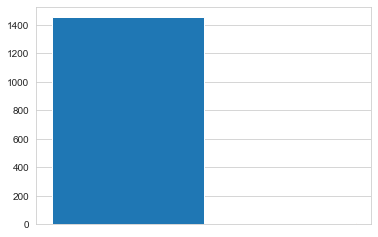

In [122]:
#OHE graph #1

plt.hist(transformed.toarray(), bins = [0,.9])
plt.gca().axes.get_xaxis().set_visible(False)

plt.show()

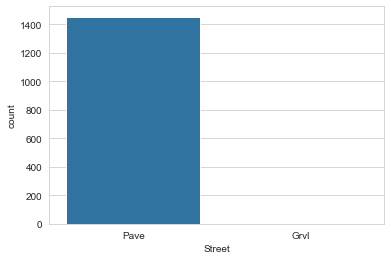

In [171]:
#OHE graph #2

sns.set_style('whitegrid')
sns.countplot(x = "Street", data = categorical_fillna_with_no)

In [ ]:
ordinal_col_dicts = {
    'ExterQual':{'TA': 3, 'Gd': 2, 'Ex': 1, 'Fa': 4,'Po':5},
    'ExterCond': {'TA': 3, 'Gd': 2, 'Fa': 4, 'Ex': 1, 'Po': 5},
    'BsmtQual': {'TA': 3, 'Gd': 2, 'Ex': 1, 'Fa': 4,'Po':5},
    'BsmtCond': {'Fa': 4, 'Gd': 2, 'Po': 5, 'TA': 3,'Ex':1, 'NA':6},
    'BsmtExposure': {'No': 4, 'Av': 2, 'Gd': 1, 'Mn': 3,'NA':5},
    'BsmtFinType1': {'Unf': 6, 'GLQ': 1, 'ALQ': 2, 'BLQ': 3, 'Rec': 4, 'LwQ': 5, 'NA':7},
    'BsmtFinType2': {'Unf': 6, 'Rec': 4, 'LwQ': 5, 'BLQ': 3, 'ALQ': 2, 'GLQ': 1, 'NA':7},
    'HeatingQC': {'Ex': 1, 'TA': 3, 'Gd': 2, 'Fa': 4, 'Po': 5},
    'CentralAir': {'Y': 1, 'N': 2},
    'Electrical': {'SBrkr': 1, 'FuseA': 2, 'FuseF': 3, 'FuseP': 4, 'Mix': 5},
    'KitchenQual': {'TA': 3, 'Gd': 2, 'Ex': 1, 'Fa': 4,'Po':5},
    'Functional': {'Typ': 1, 'Min2': 3, 'Min1': 2, 'Mod': 4, 'Maj1': 5, 'Maj2': 6, 'Sev': 7, 'Sal':8},
    #'FireplaceQu': {'Gd': 2, 'TA': 3, 'Fa': 4, 'Ex': 1, 'Po': 5},
    'GarageFinish': {'Unf': 3, 'RFn': 2, 'Fin': 1, 'NA':4},
    'GarageQual': {'TA': 3, 'Fa': 4, 'Gd': 2, 'Ex': 1, 'Po': 5},
    'GarageCond': {'TA': 3, 'Fa': 4, 'Gd': 2, 'Po': 5, 'Ex': 1},
    'PavedDrive': {'Y': 1, 'N': 3, 'P': 2},
    'LotShape': {'Reg': 1, 'IR1': 2, 'IR2': 3, 'IR3': 4},
    'Utilities': {'AllPub': 1, 'NoSeWa': 3, 'NoSewr':2, 'ELO':4},
    'LandSlope': {'Gtl': 1, 'Mod': 2, 'Sev': 3},
    'BldgType': {'1Fam': 1, 'TwnhsE': 4, 'Duplex': 3, 'Twnhs': 5, '2fmCon': 2},
    'HouseStyle': {'1Story': 1,  '2Story': 4, '1.5Fin': 2, 'SLvl': 8, 'SFoyer': 7, '1.5Unf': 3, '2.5Unf': 6, '2.5Fin': 5},
    'LotConfig': {'Inside': 1, 'Corner': 2, 'CulDSac': 3, 'FR2': 4, 'FR3': 5}
}

def ordinal_encode(data, ordinal_col_dicts): 
    """
    Ordinal encode the ordinal columns according to the values in 
    ordinal_col_dicts.
    """
    for ord_col in ordinal_col_dicts:
        ord_dict = ordinal_col_dicts[ord_col]
        data[ord_col] = data[ord_col].map(ord_dict)
    return data

train = ordinal_encode(train, ordinal_col_dicts)
test = ordinal_encode(test, ordinal_col_dicts)



In [ ]:
##### Part 1 - Question 5 #####
#Using ordinary least squares (OLS), try to predict house prices on this dataset.

#theta_best = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
#theta_best_df = pd.DataFrame(data=theta_best[np.newaxis, :], columns=X.columns)
#theta_best_df



theta_best = np.linalg.inv(test.T.dot(test)).dot(test.T).dot(train)
theta_best_df = pd.DataFrame(data=theta_best[np.newaxis, :], columns=X.columns)
print(theta_best_df)

In [ ]:
print("start #6 here")

In [4]:
##### Programming Segment - Part 2 #####
##### Programming Segment - Part 2 #####
##### Programming Segment - Part 2 #####
##### Programming Segment - Part 2 #####
##### Programming Segment - Part 2 #####
##### Programming Segment - Part 2 #####

titanic_train = pd.read_csv('Titanic_train.csv')
titanic_test = pd.read_csv('Titanic_test.csv')


In [5]:
combine = [titanic_train, titanic_test]

In [6]:
print(titanic_train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [7]:
# Getting an understanding of what percentage of the Class survived by Class

titanic_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)



,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [8]:
# Getting an understanind of what percentage of the Genders survived
titanic_train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [9]:
print("Before", titanic_train.shape, titanic_test.shape, combine[0].shape, combine[1].shape)

titanic_train = titanic_train.drop(['Ticket', 'Cabin'], axis=1)
titanic_test = titanic_test.drop(['Ticket', 'Cabin'], axis=1)
combine = [titanic_train, titanic_test]

print("After", titanic_train.shape, titanic_test.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


In [10]:
titanic_train = titanic_train.drop(['Name', 'PassengerId'], axis=1)
titanic_test = titanic_test.drop(['Name'], axis=1)
combine = [titanic_train, titanic_test]
titanic_test.shape, titanic_train.shape

((418, 8), (891, 8))

In [11]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [12]:
titanic_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,Q
1,893,3,1,47.0,1,0,7.0000,S
2,894,2,0,62.0,0,0,9.6875,Q
3,895,3,0,27.0,0,0,8.6625,S
4,896,3,1,22.0,1,1,12.2875,S


/Users/joshuamisir/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/joshuamisir/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


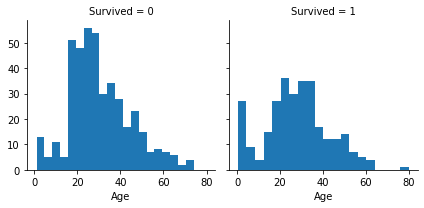

In [13]:
g = sns.FacetGrid(titanic_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [14]:
filling_missing_embarked = titanic_train.Embarked.dropna().mode()[0]
filling_missing_embarked

'S'

In [17]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(filling_missing_embarked)
    
titanic_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [18]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )

titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [60]:
titanic_test['Fare'].fillna(titanic_test['Fare'].dropna().median(), inplace=True)
titanic_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,2
1,893,3,1,47.0,1,0,7.0000,0
2,894,2,0,62.0,0,0,9.6875,2
3,895,3,0,27.0,0,0,8.6625,0
4,896,3,1,22.0,1,1,12.2875,0


In [61]:
X_train = titanic_train.drop("Survived", axis=1)
Y_train = titanic_train["Survived"]
X_test  = titanic_test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [62]:
titanic_train["Age"].fillna(titanic_train["Age"].median(skipna=True), inplace=True)

In [63]:
titanic_test["Age"].fillna(titanic_test["Age"].median(skipna=True), inplace=True)


In [64]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

/Users/joshuamisir/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


80.13